In [ ]:
pip install gwaslab 


Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [1]:
import gwaslab as gl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load gwas data

In [ ]:
import pandas as pd
import gzip

file_path = "../data/susie/gwas/21001_raw.gwas.imputed_v3.both_sexes.tsv.bgz"
with gzip.open(file_path, 'rt') as f:
    gwas_data_df = pd.read_csv(f, sep='\t') 


In [ ]:
gwas_data_df

,variant,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval
0,1:15791:C:T,T,5.446880e-09,True,359983,0.003922,1.238950e-01,894.616000,1204.870000,0.742499,0.457786
1,1:69487:G:A,A,5.768250e-06,True,359983,4.152940,1.035150e+02,-2.715450,2.360060,-1.150590,0.249902
2,1:69569:T:C,C,1.878960e-04,True,359983,135.278000,3.644560e+03,-0.484284,0.423462,-1.143630,0.252778
3,1:139853:C:T,T,5.681100e-06,True,359983,4.090200,1.018400e+02,-2.703560,2.360130,-1.145510,0.251997
4,1:692794:CA:C,C,1.105900e-01,False,359983,79621.100000,2.179000e+06,-0.016436,0.019585,-0.839228,0.401342
...,...,...,...,...,...,...,...,...,...,...,...
13791462,X:154929412:C:T,T,2.454730e-01,False,359983,176732.000000,4.837480e+06,-0.016260,0.010723,-1.516370,0.129427
13791463,X:154929637:CT:C,C,2.297260e-01,False,359983,165395.000000,4.525550e+06,-0.027098,0.011190,-2.421510,0.015456
13791464,X:154929952:CAA:C,C,2.394300e-01,False,359983,172381.000000,4.717910e+06,-0.020494,0.011278,-1.817100,0.069202
13791465,X:154930230:A:G,G,2.458870e-01,False,359983,177030.000000,4.845680e+06,-0.016347,0.010721,-1.524700,0.127334


## Data Processing 

In [ ]:
gwas_data_df['CHR'] = gwas_data_df['variant'].str.split(':').str[0]
gwas_data_df['POS'] = gwas_data_df['variant'].str.split(':').str[1]
gwas_data_df['A2'] = gwas_data_df['variant'].str.split(':').str[2]
gwas_data_df['A1'] = gwas_data_df['variant'].str.split(':').str[3]


In [ ]:
gwas_data_df.head()

,variant,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,pval,CHR,POS,A2,A1
0,1:15791:C:T,T,5.446880e-09,True,359983,0.003922,1.238950e-01,894.616000,1204.870000,0.742499,0.457786,1,15791,C,T
1,1:69487:G:A,A,5.768250e-06,True,359983,4.152940,1.035150e+02,-2.715450,2.360060,-1.150590,0.249902,1,69487,G,A
2,1:69569:T:C,C,1.878960e-04,True,359983,135.278000,3.644560e+03,-0.484284,0.423462,-1.143630,0.252778,1,69569,T,C
3,1:139853:C:T,T,5.681100e-06,True,359983,4.090200,1.018400e+02,-2.703560,2.360130,-1.145510,0.251997,1,139853,C,T
4,1:692794:CA:C,C,1.105900e-01,False,359983,79621.100000,2.179000e+06,-0.016436,0.019585,-0.839228,0.401342,1,692794,CA,C


## Minor Allele Frequency and Significant SNP Filtering 

In [ ]:
gwas_data_df=gwas_data_df.rename(columns={'variant':'SNPID', 'pval':'P'})

minor_af_filtered_df = gwas_data_df[gwas_data_df['minor_AF'] > 0.05]
significant_snp_df = minor_af_filtered_df[minor_af_filtered_df['P'] <= 5e-8]
significant_snp_df = significant_snp_df[~significant_snp_df['SNPID'].str.startswith('X:')]


In [ ]:
significant_snp_df.head()

,SNPID,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,P,CHR,POS,A2,A1
4306,1:1524437:T:C,C,0.389681,False,359983,280557.0,7673530.0,-0.071795,0.012639,-5.68043,1.344570e-08,1,1524437,T,C
4307,1:1524998:A:T,T,0.362078,False,359983,260683.0,7128940.0,-0.076017,0.012807,-5.93559,2.930620e-09,1,1524998,A,T
4311,1:1526062:T:C,C,0.386887,False,359983,278546.0,7617930.0,-0.074176,0.012566,-5.90308,3.570960e-09,1,1526062,T,C
4318,1:1527952:T:C,C,0.371677,False,359983,267595.0,7316850.0,-0.081444,0.012498,-6.51631,7.215260e-11,1,1527952,T,C
4325,1:1529994:G:C,C,0.373186,False,359983,268682.0,7346170.0,-0.082007,0.012277,-6.67983,2.395670e-11,1,1529994,G,C


In [ ]:
significant_snp_df.to_csv("../data/susie/processed_raw_data/significant_snps.csv", index=False)

## Data Formatting for COJO

In [ ]:
formatted_cojo_df = significant_snp_df.rename(columns={
    'SNPID': 'SNP',
    'A1': 'A1',
    'A2': 'A2',
    'minor_AF': 'freq',
    'beta': 'b',
    'se': 'se',
    'P': 'p',
    'n_complete_samples': 'N'
})

cojo_ready_df = formatted_cojo_df[['SNP', 'A1', 'A2', 'freq', 'b', 'se', 'p', 'N']]
cojo_ready_df.head()
cojo_ready_df.to_csv("../data/susie/reformated_data_for_cojo/cojo_extracted_file.csv", sep=" ", index=False)

## COJO Analysis

## RUN COJO

step 1. Download gcta  
`wget https://yanglab.westlake.edu.cn/software/gcta/bin/gcta-1.94.3-linux-kernel-3-x86_64.zip`

step2. unzip the downloaded folder
`gcta-1.94.3-linux-kernel-3-x86_64.zip`
`cd gcta-1.94.3-linux-kernel-3-x86_64`

step3. install gcta if not installed 
`mamba install gcta`
`export PATH=$PWD:$PATH`

step4. run cojo
`gcta64 --bfile ../ALL_chr/plink_b_files/merged_data --maf 0.05 --cojo-file ../reformated_data_for_cojo/cojo_extracted_file.csv --cojo-slct --out ../cojo/all_chr/all_chr_cojo`

In [ ]:
gcta64 --bfile ../ALL_chr/plink_b_files/merged_data --maf 0.05 --cojo-file ../reformated_data_for_cojo/cojo_extracted_file.csv --cojo-slct --out ../cojo/all_chr_new/all_chr_cojo

## COJO OUTPUT

icog-bioai@dl:/mnt/hdd_2/rediet/hypothesis-generation-demo/data/susie/gcta/gcta-1.94.3-linux-kernel-3-x86_64$ gcta64 --bfile ../../ALL_chr/plink_b_files/merged_data --maf 0.05 --cojo-file ../../reformated_data_for_cojo/cojo_extr
acted_file.csv --cojo-slct --out all_chr_cojo
*******************************************************************
* Genome-wide Complex Trait Analysis (GCTA)
* version v1.94.1 Linux
* Built at Dec 16 2024 16:35:13, by GCC 8.3
* (C) 2010-present, Yang Lab, Westlake University
* Please report bugs to Jian Yang <jian.yang@westlake.edu.cn>
*******************************************************************
Analysis started at 06:33:19 PST on Fri Feb 28 2025.
Hostname: dl

Accepted options:
--bfile ../../ALL_chr/plink_b_files/merged_data
--maf 0.05
--cojo-file ../../reformated_data_for_cojo/cojo_extracted_file.csv
--cojo-slct
--out ../../cojo/all_chr/all_chr_cojo


Reading PLINK FAM file from [../../ALL_chr/plink_b_files/merged_data.fam].
2504 individuals to be included from [../../ALL_chr/plink_b_files/merged_data.fam].
Reading PLINK BIM file from [../../ALL_chr/plink_b_files/merged_data.bim].
46867 SNPs to be included from [../../ALL_chr/plink_b_files/merged_data.bim].
Reading PLINK BED file from [../../ALL_chr/plink_b_files/merged_data.bed] in SNP-major format ...
Genotype data for 2504 individuals and 46867 SNPs to be included from [../../ALL_chr/plink_b_files/merged_data.bed].
Calculating allele frequencies ...
Filtering SNPs with MAF > 0.05 ...
After filtering SNPs with MAF > 0.05, there are 45866 SNPs (1001 SNPs with MAF < 0.05).

Reading GWAS summary-level statistics from [../../reformated_data_for_cojo/cojo_extracted_file.csv] ...
GWAS summary statistics of 49937 SNPs read from [../../reformated_data_for_cojo/cojo_extracted_file.csv].
Phenotypic variance estimated from summary statistics of all 49937 SNPs: 22.4081 (variance of logit for case-control studies).
Matching the GWAS meta-analysis results to the genotype data ...
Warning: can't match the reference alleles of 5 SNPs to those in the genotype data. These SNPs have been saved in [all_chr_cojo.badsnps].
10022 SNP(s) have large difference of allele frequency between the GWAS summary data and the reference sample. These SNPs have been saved in [all_chr_cojo.freq.badsnps].
35839 SNPs are matched to the genotype data.
Calculating the variance of SNP genotypes ...

Performing stepwise model selection on 35839 SNPs to select association signals ... (p cutoff = 5e-08; collinearity cutoff = 0.9)
(Assuming complete linkage equilibrium between SNPs which are more than 10Mb away from each other)
5 associated SNPs have been selected.
10 associated SNPs have been selected.
15 associated SNPs have been selected.
20 associated SNPs have been selected.
25 associated SNPs have been selected.
30 associated SNPs have been selected.
35 associated SNPs have been selected.
40 associated SNPs have been selected.
45 associated SNPs have been selected.
50 associated SNPs have been selected.
55 associated SNPs have been selected.
60 associated SNPs have been selected.
65 associated SNPs have been selected.
70 associated SNPs have been selected.
75 associated SNPs have been selected.
80 associated SNPs have been selected.
85 associated SNPs have been selected.
90 associated SNPs have been selected.
95 associated SNPs have been selected.
100 associated SNPs have been selected.
105 associated SNPs have been selected.
110 associated SNPs have been selected.
115 associated SNPs have been selected.
120 associated SNPs have been selected.
125 associated SNPs have been selected.
130 associated SNPs have been selected.
135 associated SNPs have been selected.
140 associated SNPs have been selected.
145 associated SNPs have been selected.
150 associated SNPs have been selected.
155 associated SNPs have been selected.
160 associated SNPs have been selected.
165 associated SNPs have been selected.
170 associated SNPs have been selected.
175 associated SNPs have been selected.
180 associated SNPs have been selected.
185 associated SNPs have been selected.
190 associated SNPs have been selected.
195 associated SNPs have been selected.
200 associated SNPs have been selected.
205 associated SNPs have been selected.
210 associated SNPs have been selected.
215 associated SNPs have been selected.
220 associated SNPs have been selected.
225 associated SNPs have been selected.
230 associated SNPs have been selected.
235 associated SNPs have been selected.
240 associated SNPs have been selected.
245 associated SNPs have been selected.
250 associated SNPs have been selected.
255 associated SNPs have been selected.
260 associated SNPs have been selected.
265 associated SNPs have been selected.
270 associated SNPs have been selected.
275 associated SNPs have been selected.
280 associated SNPs have been selected.
285 associated SNPs have been selected.
290 associated SNPs have been selected.
295 associated SNPs have been selected.
300 associated SNPs have been selected.
305 associated SNPs have been selected.
310 associated SNPs have been selected.
315 associated SNPs have been selected.
320 associated SNPs have been selected.
325 associated SNPs have been selected.
330 associated SNPs have been selected.
335 associated SNPs have been selected.
340 associated SNPs have been selected.
345 associated SNPs have been selected.
350 associated SNPs have been selected.
355 associated SNPs have been selected.
360 associated SNPs have been selected.
365 associated SNPs have been selected.
370 associated SNPs have been selected.
375 associated SNPs have been selected.
380 associated SNPs have been selected.
385 associated SNPs have been selected.
390 associated SNPs have been selected.
395 associated SNPs have been selected.
400 associated SNPs have been selected.
405 associated SNPs have been selected.
410 associated SNPs have been selected.
415 associated SNPs have been selected.
420 associated SNPs have been selected.
425 associated SNPs have been selected.
430 associated SNPs have been selected.
435 associated SNPs have been selected.
440 associated SNPs have been selected.
445 associated SNPs have been selected.
450 associated SNPs have been selected.
455 associated SNPs have been selected.
460 associated SNPs have been selected.
465 associated SNPs have been selected.
470 associated SNPs have been selected.
475 associated SNPs have been selected.
480 associated SNPs have been selected.
485 associated SNPs have been selected.
490 associated SNPs have been selected.
495 associated SNPs have been selected.
500 associated SNPs have been selected.
505 associated SNPs have been selected.
Finally, 506 associated SNPs are selected.
Performing joint analysis on all the 506 selected signals ...
Saving the 506 independent signals to [all_chr_cojo.jma.cojo] ...
Saving the LD structure of 506 independent signals to [all_chr_cojo.ldr.cojo] ...
Saving the conditional analysis results of 33822 remaining SNPs to [all_chr_cojo.cma.cojo] ...
(5 SNPs eliminated by backward selection and 1506 SNPs filtered by collinearity test are not included in the output)

Analysis finished at 06:41:37 PST on Fri Feb 28 2025
Overall computational time: 8 minutes 18 sec.

## Extract Most significant variant snd Define region around the most significant SNP

In [4]:
import pandas as pd
cojo_results_df = pd.read_csv("../data/susie/cojo/all_chr/all_chr_cojo.jma.cojo", delim_whitespace=True)
cojo_results_df.head()


/tmp/ipykernel_4031964/3749684294.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cojo_results_df = pd.read_csv("../data/susie/cojo/all_chr/all_chr_cojo.jma.cojo", delim_whitespace=True)


,Chr,SNP,bp,refA,freq,b,se,p,n,freq_geno,bJ,bJ_se,pJ,LD_r
0,1,1:1590521:G:A,1590521,A,0.265231,-0.100267,0.012675,2.562560e-15,357785,0.258986,-0.126050,0.012930,1.873560e-22,0.003818
1,1,1:1866376:G:A,1866376,A,0.496263,0.067971,0.011644,5.306640e-09,330513,0.516374,0.074590,0.011663,1.598820e-10,0.034421
2,1,1:2427712:C:T,2427712,T,0.455874,-0.070197,0.011267,4.660130e-10,355744,0.326478,-0.082146,0.011438,6.870130e-13,-0.099375
3,1,1:6669970:C:G,6669970,G,0.355676,0.064158,0.011662,3.767190e-08,359447,0.358027,0.075553,0.011830,1.696020e-10,0.000000
4,1,1:23353906:CT:C,23353906,C,0.167309,0.085668,0.014989,1.094920e-08,357912,0.296126,0.083185,0.014994,2.891550e-08,0.023570


In [5]:
cojo_results_df.shape

(506, 14)

In [6]:
most_significant_snp = cojo_results_df.sort_values(by='p').head(1)
most_significant_snp

,Chr,SNP,bp,refA,freq,b,se,p,n,freq_geno,bJ,bJ_se,pJ,LD_r
416,16,16:53828066:C:T,53828066,T,0.392165,0.349002,0.011405,1.224550e-205,360397,0.221446,-0.481828,0.030674,1.336110e-55,0.821113


In [7]:
import pandas as pd
significant_snp_df=pd.read_csv("../data/susie/processed_raw_data/significant_snps.csv", delim_whitespace=False)
significant_snp_df

/tmp/ipykernel_4031964/3818737158.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  significant_snp_df=pd.read_csv("../data/susie/processed_raw_data/significant_snps.csv", delim_whitespace=False)


,SNPID,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,P,CHR,POS,A2,A1
0,1:1524437:T:C,C,0.389681,False,359983,280557.0,7673530.0,-0.071795,0.012639,-5.68043,1.344570e-08,1,1524437,T,C
1,1:1524998:A:T,T,0.362078,False,359983,260683.0,7128940.0,-0.076017,0.012807,-5.93559,2.930620e-09,1,1524998,A,T
2,1:1526062:T:C,C,0.386887,False,359983,278546.0,7617930.0,-0.074176,0.012566,-5.90308,3.570960e-09,1,1526062,T,C
3,1:1527952:T:C,C,0.371677,False,359983,267595.0,7316850.0,-0.081444,0.012498,-6.51631,7.215260e-11,1,1527952,T,C
4,1:1529994:G:C,C,0.373186,False,359983,268682.0,7346170.0,-0.082007,0.012277,-6.67983,2.395670e-11,1,1529994,G,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49932,22:40718100:G:A,A,0.206546,False,359983,148706.0,4062300.0,-0.081962,0.013802,-5.93855,2.878220e-09,22,40718100,G,A
49933,22:40720704:A:G,G,0.350510,False,359983,252355.0,6895670.0,-0.085960,0.011722,-7.33344,2.247820e-13,22,40720704,A,G
49934,22:40720963:C:T,C,0.419873,False,359983,417672.0,11428300.0,-0.063540,0.011365,-5.59108,2.258230e-08,22,40720963,C,T
49935,22:40722745:A:G,G,0.350605,False,359983,252424.0,6897760.0,-0.084771,0.011740,-7.22060,5.185860e-13,22,40722745,A,G


Formatted Data for tiebebe

In [ ]:
variant_position = 53828066
start_pos= variant_position- 500000
end_pos= variant_position + 500000 
region_snp_df = significant_snp_df[(significant_snp_df['POS'] >= start_pos) & (significant_snp_df['POS'] <= end_pos)]
region_snp_df.head(20)
region_snp_df["log_pvalue"] = -np.log10(region_snp_df["P"])
region_snp_df[["SNPID", "beta", "CHR","log_pvalue","POS","minor_allele","minor_AF","se"]].to_csv("chr16_all_region_snps.csv")

/tmp/ipykernel_495899/3233520227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_snp_df["log_pvalue"] = -np.log10(region_snp_df["P"])


## Expanding the region of each independet snp identified by cojo

In [ ]:
window_size = 500000  
output_dir = "../data/susie/ALL_chr/"  

for index, row in cojo_results_df.iterrows():
    chrom = row["Chr"]  
    pos = row["bp"]  
    start_pos = pos - window_size
    end_pos = pos + window_size

    df_region = significant_snp_df[
        (significant_snp_df["CHR"] == chrom) & 
        (significant_snp_df["POS"] >= start_pos) & 
        (significant_snp_df["POS"] <= end_pos)
    ]
    
    
    output_file = f"{output_dir}/chr{chrom}_pos{pos}_snps.txt"
    df_region.to_csv(output_file, sep="\t", index=False)

    print(f"Extracted {len(df_region)} SNPs for Chr{chrom} position {pos} and saved to {output_file}")


Extracted 70 SNPs for Chr1 position 1590521 and saved to ../data/susie/ALL_chr//chr1_pos1590521_snps.txt
Extracted 70 SNPs for Chr1 position 1866376 and saved to ../data/susie/ALL_chr//chr1_pos1866376_snps.txt
Extracted 75 SNPs for Chr1 position 2427712 and saved to ../data/susie/ALL_chr//chr1_pos2427712_snps.txt
Extracted 5 SNPs for Chr1 position 6669970 and saved to ../data/susie/ALL_chr//chr1_pos6669970_snps.txt
Extracted 106 SNPs for Chr1 position 23353906 and saved to ../data/susie/ALL_chr//chr1_pos23353906_snps.txt
Extracted 14 SNPs for Chr1 position 32165495 and saved to ../data/susie/ALL_chr//chr1_pos32165495_snps.txt
Extracted 59 SNPs for Chr1 position 33795572 and saved to ../data/susie/ALL_chr//chr1_pos33795572_snps.txt
Extracted 4 SNPs for Chr1 position 34584393 and saved to ../data/susie/ALL_chr//chr1_pos34584393_snps.txt
Extracted 114 SNPs for Chr1 position 39571992 and saved to ../data/susie/ALL_chr//chr1_pos39571992_snps.txt
Extracted 2 SNPs for Chr1 position 42423300 a

In [8]:
chr16_pos53828066_snps_ld_test=pd.read_csv("../data/susie/ALL_chr/region_snplist/chr16_pos53828066_snps.txt",sep="\t")

In [9]:
chr16_pos53828066_snps_ld_test

,SNPID,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,P,CHR,POS,A2,A1
0,16:53563327:T:C,C,0.134918,False,359983,97136.3,2667370.0,0.092182,0.016350,5.63812,1.720430e-08,16,53563327,T,C
1,16:53598310:A:G,G,0.136248,False,359983,98094.0,2694430.0,0.105179,0.016285,6.45861,1.058010e-10,16,53598310,A,G
2,16:53599637:G:A,A,0.082787,False,359983,59603.7,1626100.0,-0.121581,0.020284,-5.99388,2.050880e-09,16,53599637,G,A
3,16:53606229:G:A,A,0.171363,False,359983,123376.0,3386410.0,0.082696,0.014824,5.57843,2.428700e-08,16,53606229,G,A
4,16:53606339:A:G,G,0.171365,False,359983,123377.0,3386420.0,0.082559,0.014824,5.56929,2.559640e-08,16,53606339,A,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,16:53906852:T:C,C,0.497690,False,359983,358320.0,9800360.0,-0.070447,0.011192,-6.29445,3.088520e-10,16,53906852,T,C
259,16:53907347:G:A,A,0.460226,False,359983,331347.0,9062120.0,-0.066850,0.011218,-5.95945,2.533190e-09,16,53907347,G,A
260,16:53907498:G:A,A,0.495572,False,359983,356795.0,9758020.0,-0.072473,0.011182,-6.48111,9.116800e-11,16,53907498,G,A
261,16:53908657:T:C,C,0.460060,False,359983,331228.0,9059040.0,-0.066019,0.011215,-5.88675,3.942020e-09,16,53908657,T,C


In [10]:
chr16_pos53828066_snps_ld_test.shape

(263, 15)

## RUN PLINK

In [11]:
!plink \
  --bfile "../data/susie/plink_binary/merged_data" \
  --keep-allele-order \
  --r square \
  --extract ../data/susie/ALL_chr/region_snplist/chr16_pos53828066_snps.txt \
  --out ../data/susie/ALL_chr/ld/test_sig_locus_mt

!plink \
  --bfile "../data/susie/plink_binary/merged_data" \
  --keep-allele-order \
  --r2 square \
  --extract ../data/susie/ALL_chr/region_snplist/chr16_pos53828066_snps.txt \
  --out ../data/susie/ALL_chr/ld/test_sig_locus_mt_r2

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../data/susie/ALL_chr/ld/test_sig_locus_mt.log.
Options in effect:
  --bfile ../data/susie/plink_binary/merged_data
  --extract ../data/susie/ALL_chr/region_snplist/chr16_pos53828066_snps.txt
  --keep-allele-order
  --out ../data/susie/ALL_chr/ld/test_sig_locus_mt
  --r square

257418 MB RAM detected; reserving 128709 MB for main workspace.
49063 variants loaded from .bim file.
503 people (0 males, 0 females, 503 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ../data/susie/ALL_chr/ld/test_sig_locus_mt.nosex .
--extract: 259 variants remaining.
Using up to 27 threads (change this with --threads).
Before main variant filters, 503 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566

## Finemapping

In [42]:

from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri as numpy2ri
import rpy2.robjects.pandas2ri as pandas2ri
import matplotlib.pyplot as plt
numpy2ri.activate()
pandas2ri.activate()

In [43]:
susieR = importr('susieR')

## Visualization of LD (Linkage Disequilibrium) Matrices

In [44]:
import pandas as pd
ld_r = pd.read_csv("../data/susie/ALL_chr/ld/test_sig_locus_mt.ld", sep="\t", header=None)
R_df = ld_r.values
ld2 = pd.read_csv("../data/susie/ALL_chr/ld/test_sig_locus_mt_r2.ld",sep="\t",header=None)
R_df2 = ld2.values
R_df.shape

(259, 259)

Text(0.5, 1.0, 'LD r2 matrix')

<Figure size 2000x2000 with 0 Axes>

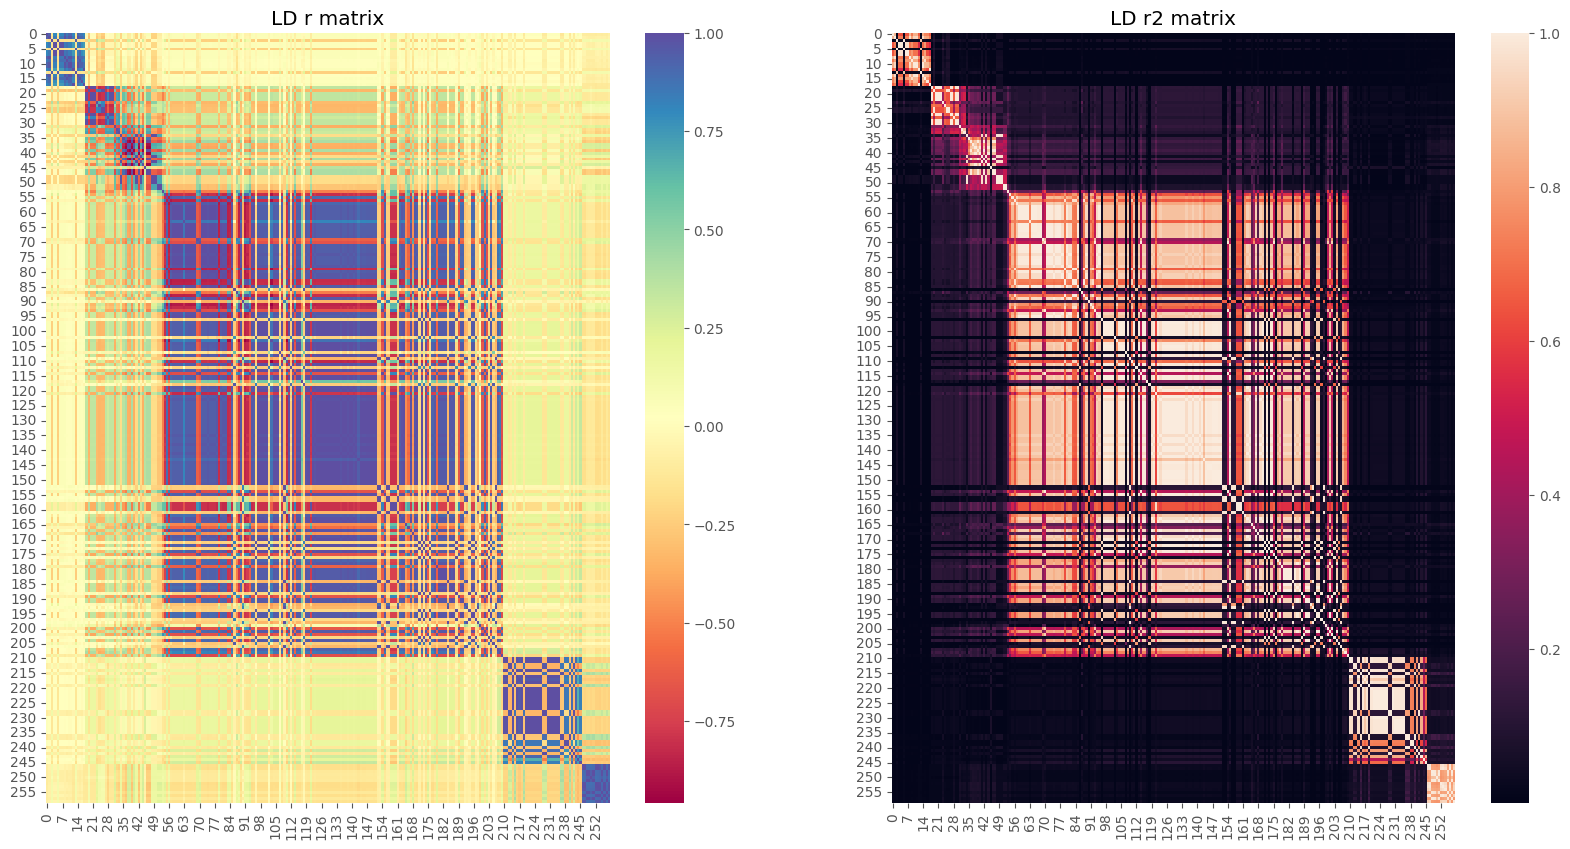

In [45]:
plt.figure(figsize=(10,10),dpi=200)
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
sns.heatmap(data=R_df,cmap="Spectral",ax=ax[0])
sns.heatmap(data=R_df2,ax=ax[1])
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")

In [46]:
print(type(R_df))  
print(R_df.shape) 
print(R_df[:5, :5]) 

<class 'numpy.ndarray'>
(259, 259)
[[ 1.        0.931797 -0.129286  0.796609  0.796609]
 [ 0.931797  1.       -0.156479  0.852617  0.852617]
 [-0.129286 -0.156479  1.       -0.156806 -0.156806]
 [ 0.796609  0.852617 -0.156806  1.        1.      ]
 [ 0.796609  0.852617 -0.156806  1.        1.      ]]


In [47]:
ro.r('set.seed(123)')
fit = susieR.susie_rss(
    bhat = chr16_pos53828066_snps_ld_test["beta"].values.reshape(len(chr16_pos53828066_snps_ld_test), 1),
    shat = chr16_pos53828066_snps_ld_test["se"].values.reshape(len(chr16_pos53828066_snps_ld_test), 1),
    R = R_df,
    L = 10,
    n = 503
)

credible_sets = susieR.susie_get_cs(fit, coverage=0.95, min_abs_corr=0.5, Xcorr=R_df)


 
                  Please check consistency between summary statistics and LD matrix.
                  See https://stephenslab.github.io/susieR/articles/susierss_diagnostic.html

 

  The dimension of R (259 x 259) does not agree with expected (263 x 263)



RRuntimeError: Error in (function (z, R, n, bhat, shat, var_y, z_ld_weight = 0, estimate_residual_variance = FALSE,  : 
  The dimension of R (259 x 259) does not agree with expected (263 x 263)


## ISSUE:

From the plink result there are SNPS that are found in the gwas data(21001_raw.gwas.imputed_v3.both_sexes) which are missing from the vcf 1000 genomic population data. 

Inorder to see which snps are missing the method i used is

1.only store the SNP column that are found in the merged_data.bim(all chr plink binary files) to available_snps.txt
   `awk '{print $2}' ../data/susie/plink_binary/merged_data.bim > available_snps.txt`

2. extract SNPs that are not common from the avaliable_snps and from the current chr16_pos53828066_snps.txt

`grep -vFf available_snps.txt ../data/susie/ALL_chr/chr16_pos53828066_snps.txt`
    SNPID   minor_allele    minor_AF        low_confidence_variant  n_complete_samples      AC      ytx     beta   se       tstat   P       CHR     POS     A2      A1
    16:53798630:C:CT        CT      0.115132        False   359983  82890.9 2260270.0       -0.155318       0.0176772       -8.78632        1.55203e-18     16      53798630        C       CT
    16:53799977:T:G G       0.421581        False   359983  303524.0        8371400.0       0.340303        0.0112735       30.1862 6.39588e-200    16      53799977        T       G
    16:53812783:TTTTG:T     T       0.390218        False   359983  280943.0        7751780.0       0.348645       0.01153  30.2382 1.33422e-200    16      53812783        TTTTG   T
    16:53820996:C:G G       0.392556        False   359983  282627.0        7799390.0       0.349687        0.0114009       30.6719 2.49515e-206    16      53820996        C       G

From the result there are total of `4` SNPs which are not included in the ld matrix.
The missing snps are also not found in the original vcf data before it is converted to plink binary files.

The current solution i used is to exclude these snps from the chr16_pos53828066_snps.txt so that to match the shape of the ld_matrix. 

In [48]:
missing_snps=pd.read_csv("../data/susie/snplist/missing_SNPS.txt", sep="\t")
missing_snps

,SNPID,minor_allele,minor_AF,low_confidence_variant,n_complete_samples,AC,ytx,beta,se,tstat,P,CHR,POS,A2,A1
0,16:53798630:C:CT,CT,0.115132,False,359983,82890.9,2260270.0,-0.155318,0.017677,-8.78632,1.552030e-18,16,53798630,C,CT
1,16:53799977:T:G,G,0.421581,False,359983,303524.0,8371400.0,0.340303,0.011274,30.18620,6.395880e-200,16,53799977,T,G
2,16:53812783:TTTTG:T,T,0.390218,False,359983,280943.0,7751780.0,0.348645,0.011530,30.23820,1.334220e-200,16,53812783,TTTTG,T
3,16:53820996:C:G,G,0.392556,False,359983,282627.0,7799390.0,0.349687,0.011401,30.67190,2.495150e-206,16,53820996,C,G


In [19]:
filtered_chr16_pos53828066_snps_ld_test = chr16_pos53828066_snps_ld_test[~chr16_pos53828066_snps_ld_test["POS"].isin(missing_snps["POS"])]

In [20]:
filtered_chr16_pos53828066_snps_ld_test.shape

(259, 15)

## Run finemapping with susieR

In [49]:
ro.r('set.seed(123)')
fit = susieR.susie_rss(
    bhat = filtered_chr16_pos53828066_snps_ld_test["beta"].values.reshape(len(R_df), 1),
    shat = filtered_chr16_pos53828066_snps_ld_test["se"].values.reshape(len(R_df), 1),
    R = R_df,
    L = 10,
    n = 503
)

## Extract credible sets and pip

In [50]:
credible_sets = susieR.susie_get_cs(fit, coverage=0.95, min_abs_corr=0.5, Xcorr=R_df)[0]
print(credible_sets)

$L1
[1] 104

$L2
[1] 92

$L4
[1] 111

$L6
[1] 160

$L7
[1] 115

$L9
[1] 90




In [51]:

filtered_chr16_pos53828066_snps_ld_test["cs"] = 0
n_cs = len(susieR.susie_get_cs(fit, coverage = 0.95, min_abs_corr = 0.5, Xcorr = R_df)[0])
print(n_cs)
credible_sets = susieR.susie_get_cs(fit, coverage=0.95, min_abs_corr=0.5, Xcorr=R_df)[0]

for i in range(n_cs):
    cs_index = credible_sets[i]
    filtered_chr16_pos53828066_snps_ld_test.loc[np.array(cs_index)-1, "cs"] = i + 1

filtered_chr16_pos53828066_snps_ld_test["pip"] = np.array(susieR.susie_get_pip(fit))

6


/tmp/ipykernel_4031964/427769197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chr16_pos53828066_snps_ld_test["cs"] = 0
/tmp/ipykernel_4031964/427769197.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chr16_pos53828066_snps_ld_test["pip"] = np.array(susieR.susie_get_pip(fit))


## Create regional plot

/tmp/ipykernel_4031964/511045025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_chr16_pos53828066_snps_ld_test[col_to_plot] = -np.log10(filtered_chr16_pos53828066_snps_ld_test["P"])


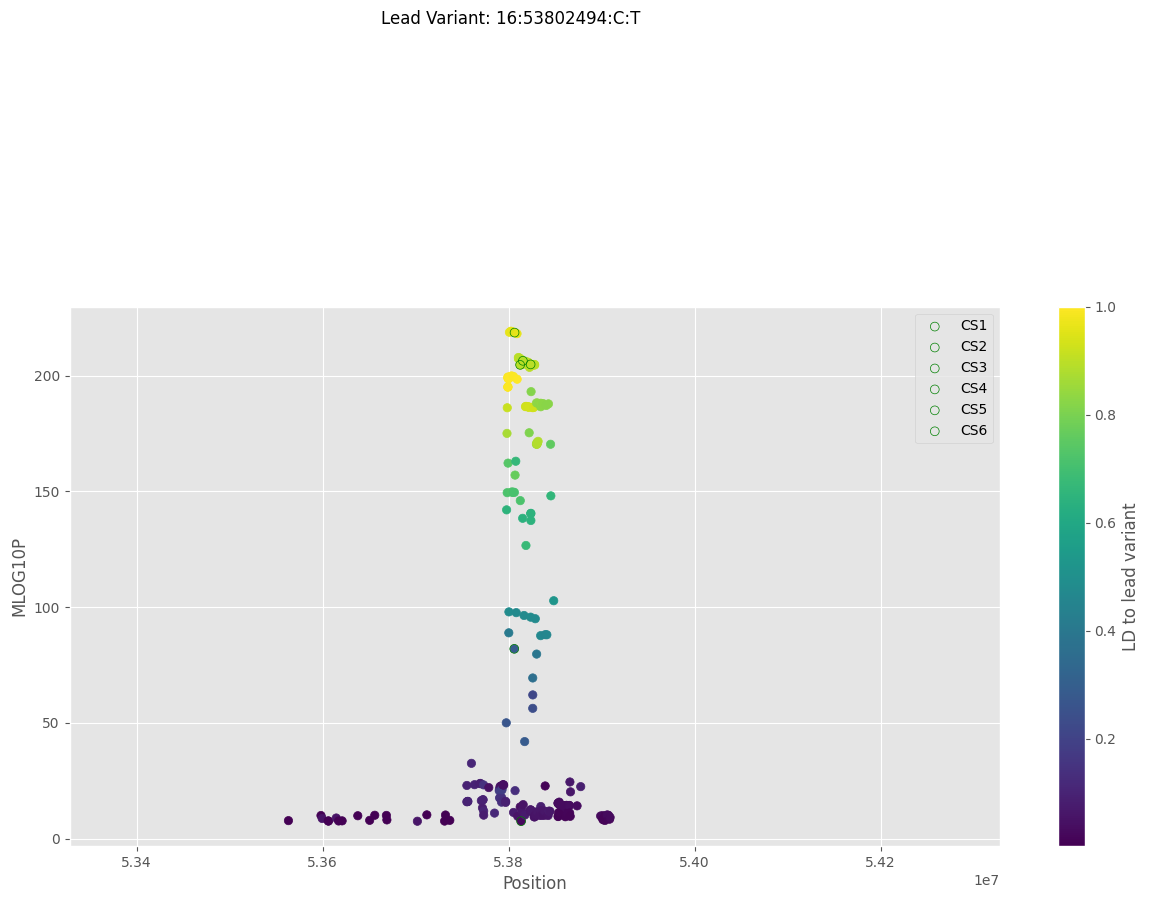

In [52]:
plt.style.use("ggplot")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

col_to_plot = "MLOG10P"
filtered_chr16_pos53828066_snps_ld_test[col_to_plot] = -np.log10(filtered_chr16_pos53828066_snps_ld_test["P"])

p = ax.scatter(
    filtered_chr16_pos53828066_snps_ld_test["POS"], 
    filtered_chr16_pos53828066_snps_ld_test[col_to_plot], 
    c=ld2[filtered_chr16_pos53828066_snps_ld_test["P"].idxmin()]
)

lead_x = filtered_chr16_pos53828066_snps_ld_test.loc[filtered_chr16_pos53828066_snps_ld_test["P"].idxmin(), "POS"]
lead_y = filtered_chr16_pos53828066_snps_ld_test.loc[filtered_chr16_pos53828066_snps_ld_test["P"].idxmin(), col_to_plot]

ax.annotate(
    f"Lead Variant: {filtered_chr16_pos53828066_snps_ld_test.loc[filtered_chr16_pos53828066_snps_ld_test['P'].idxmin(), 'SNPID']}", 
    (lead_x, lead_y), 
    textcoords="offset points", xytext=(0, lead_y + 2), ha='center', fontsize=12
)

credible_sets = susieR.susie_get_cs(fit, coverage=0.95, min_abs_corr=0.5, Xcorr=R_df)[0]

n_cs = len(credible_sets)
for i in range(n_cs):
    cs_index = credible_sets[i]
    pos = filtered_chr16_pos53828066_snps_ld_test.loc[np.array(cs_index) - 1, "POS"]
    y = filtered_chr16_pos53828066_snps_ld_test.loc[np.array(cs_index) - 1, col_to_plot]
    
    ax.scatter(pos, y, marker='o', s=40, label=f"CS{i+1}", edgecolors="green", facecolors="none")

plt.colorbar(p, label="LD to lead variant")
ax.set_xlabel("Position")
ax.set_ylabel(col_to_plot)
ax.set_xlim((53328066, 54328066))
plt.legend()
plt.show()


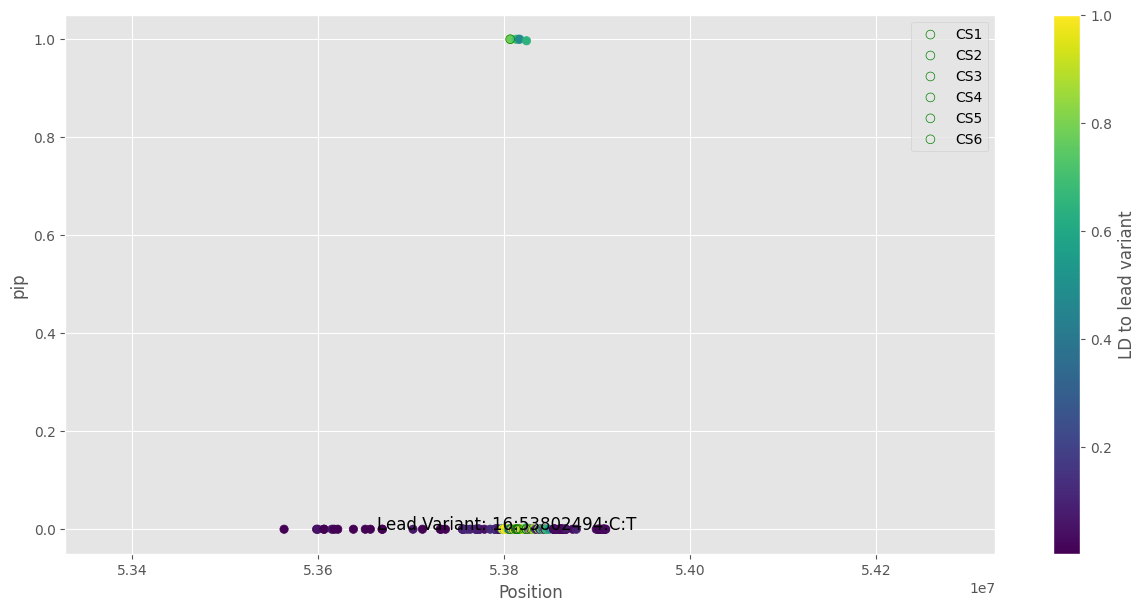

In [53]:
plt.style.use("ggplot")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

col_to_plot = "pip"
p = ax.scatter(
    filtered_chr16_pos53828066_snps_ld_test["POS"], 
    filtered_chr16_pos53828066_snps_ld_test[col_to_plot], 
    c=ld2[filtered_chr16_pos53828066_snps_ld_test["P"].idxmin()]
)

lead_x = filtered_chr16_pos53828066_snps_ld_test.loc[filtered_chr16_pos53828066_snps_ld_test["P"].idxmin(), "POS"]
lead_y = filtered_chr16_pos53828066_snps_ld_test.loc[filtered_chr16_pos53828066_snps_ld_test["P"].idxmin(), col_to_plot]

ax.annotate(
    f"Lead Variant: {filtered_chr16_pos53828066_snps_ld_test.loc[filtered_chr16_pos53828066_snps_ld_test['P'].idxmin(), 'SNPID']}", 
    (lead_x, lead_y), 
    textcoords="offset points", xytext=(0, lead_y + 0.02), ha='center', fontsize=12
)

credible_sets = susieR.susie_get_cs(fit, coverage=0.95, min_abs_corr=0.5, Xcorr=R_df)[0]
n_cs = len(credible_sets)

for i in range(n_cs):
    cs_index = credible_sets[i]
    pos = filtered_chr16_pos53828066_snps_ld_test.loc[np.array(cs_index) - 1, "POS"]
    y = filtered_chr16_pos53828066_snps_ld_test.loc[np.array(cs_index) - 1, col_to_plot]
    
    ax.scatter(pos, y, marker='o', s=40, label=f"CS{i+1}", edgecolors="green", facecolors="none")

plt.colorbar(p, label="LD to lead variant")
ax.set_xlabel("Position")
ax.set_ylabel(col_to_plot)
ax.set_xlim((53328066, 54328066))
# ax.set_ylim((0, 0.1))
plt.legend()
plt.show()


In [54]:
cs_index = np.array(credible_sets[0])
for i in range(1, n_cs):
    cs_index = np.concatenate((cs_index, np.array(credible_sets[i])), axis=0)
credible_snps = filtered_chr16_pos53828066_snps_ld_test.loc[cs_index - 1, :]

print(credible_snps)

               SNPID minor_allele  minor_AF  low_confidence_variant  \
103  16:53812433:T:C            C  0.394697                   False   
91   16:53806453:A:G            G  0.403039                   False   
110  16:53813498:C:T            T  0.053761                   False   
159  16:53823727:T:C            C  0.392272                   False   
114  16:53815435:T:C            C  0.392976                   False   
89   16:53806145:T:C            T  0.265525                   False   

     n_complete_samples        AC         ytx      beta        se     tstat  \
103              359983  284169.0   7841560.0  0.348654  0.011392  30.60630   
91               359983  290174.0   8008360.0  0.359082  0.011349  31.63960   
110              359983   38706.0   1054900.0 -0.137141  0.024723  -5.54708   
159              359983  282422.0   7793720.0  0.349124  0.011402  30.62060   
114              359983  282929.0   7807840.0  0.350372  0.011399  30.73760   
89               359983  528

## check LD of the causal variant and variants in the credible set 

In [32]:
!echo "16:53812433:T:C  " > credible.snplist
!echo "16:53806453:A:G " >> credible.snplist
!echo "16:53813498:C:T " >> credible.snplist
!echo "16:53823727:T:C  " >> credible.snplist
!echo "16:53815435:T:C  " >> credible.snplist
!echo "16:53806145:T:C  " >> credible.snplist

In [33]:
!plink \
  --bfile "../data/susie/plink_binary/merged_data" \
  --keep-allele-order \
  --r square \
  --extract credible.snplist \
  --out ../data/susie/ALL_chr/ld/credible_r

!plink \
  --bfile "../data/susie/plink_binary/merged_data" \
  --keep-allele-order \
  --r2 square \
  --extract credible.snplist \
  --out ../data/susie/ALL_chr/ld/credible_r2

PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../data/susie/ALL_chr/ld/credible_r.log.
Options in effect:
  --bfile ../data/susie/plink_binary/merged_data
  --extract credible.snplist
  --keep-allele-order
  --out ../data/susie/ALL_chr/ld/credible_r
  --r square

257418 MB RAM detected; reserving 128709 MB for main workspace.
49063 variants loaded from .bim file.
503 people (0 males, 0 females, 503 ambiguous) loaded from .fam.
Ambiguous sex IDs written to ../data/susie/ALL_chr/ld/credible_r.nosex .
--extract: 6 variants remaining.
Using up to 27 threads (change this with --threads).
Before main variant filters, 503 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done

## Load LD and plot

In [35]:
credible_snplist=["16:53812433:T:C ","16:53806453:A:G", "16:53813498:C:T", "16:53823727:T:C", "16:53815435:T:C", "16:53806145:T:C "]
ld = pd.read_csv("../data/susie/ALL_chr/ld/credible_r.ld",sep="\t",header=None)
ld.columns=credible_snplist
ld.index=credible_snplist
ld2 = pd.read_csv("../data/susie/ALL_chr/ld/credible_r2.ld",sep="\t",header=None)
ld2.columns=credible_snplist
ld2.index=credible_snplist

Text(0.5, 1.0, 'LD r2 matrix')

<Figure size 2000x2000 with 0 Axes>

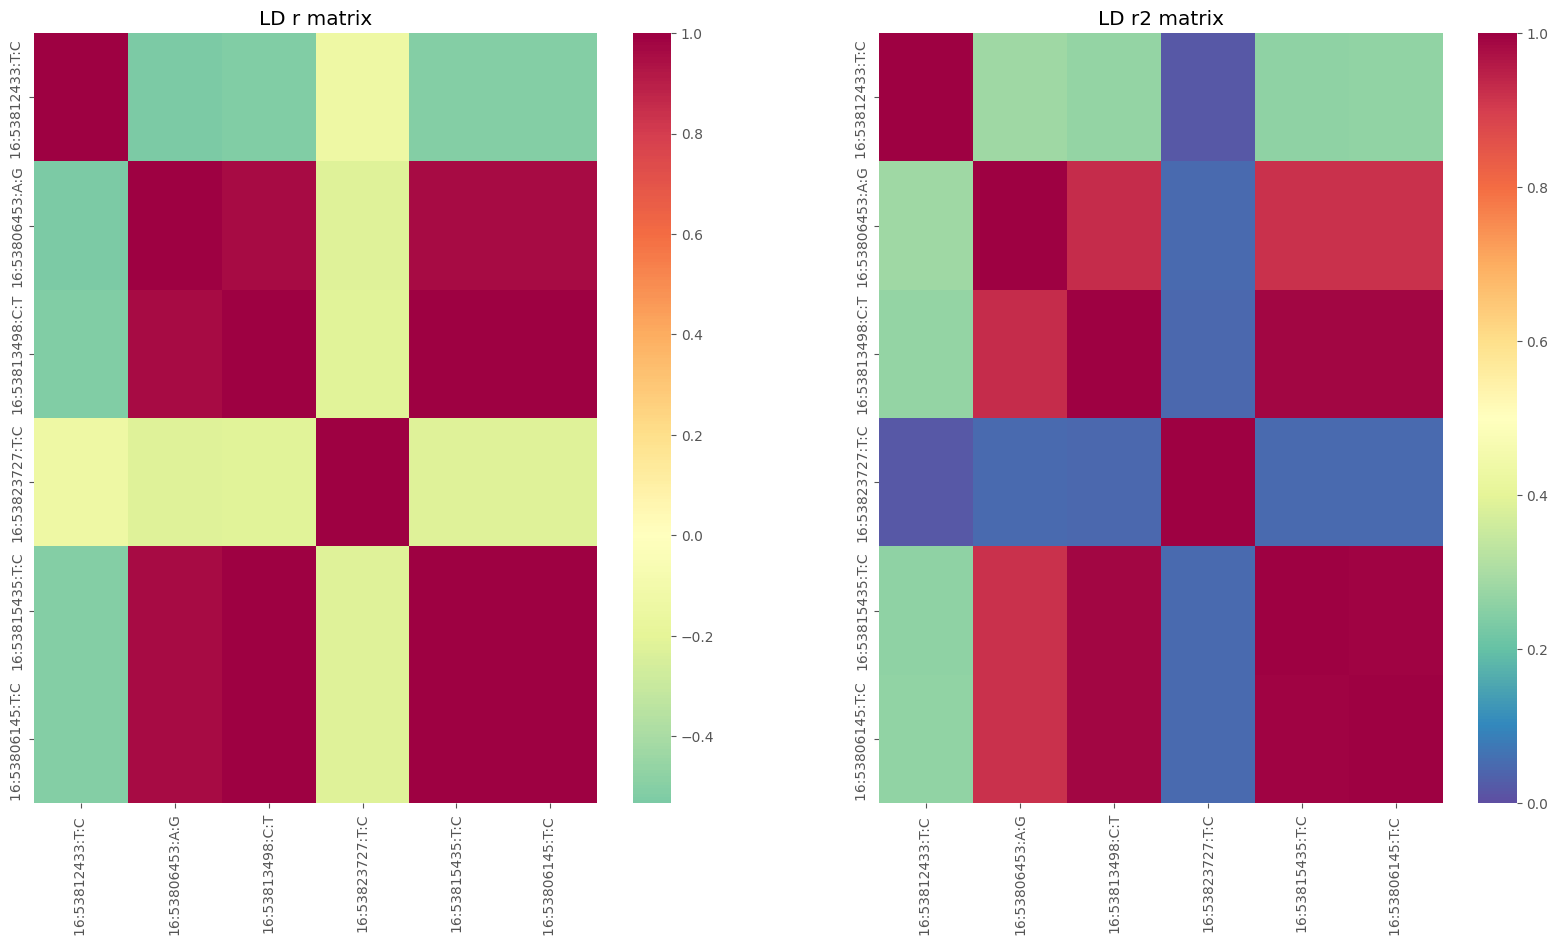

In [36]:
plt.figure(figsize=(10,10),dpi=200)
fig, ax = plt.subplots(ncols=2,figsize=(20,10))
sns.heatmap(data=ld, cmap="Spectral_r",ax=ax[0],center=0)
sns.heatmap(data=ld2,cmap="Spectral_r",ax=ax[1],vmin=0,vmax=1)
ax[0].set_title("LD r matrix")
ax[1].set_title("LD r2 matrix")